# Minor Project -- Analysis of a SAT Dataset

This Jupyter Notebook has been made by me, Lakshya Gupta, who has been asked to analyze a dataset given in the form of a csv of different students with their General SAT scores listed with different variables like their gender, race, lunch meal program etc. 

<b> Objective: </b> To understand how the student's performance (test scores) is affected by the other variables (Gender, Ethnicity, Parental level of education, Lunch, Test preparation course). 



In [1]:
from matplotlib import pyplot as plt 
import pandas as pd 
import numpy as np
%matplotlib inline

In [2]:
data = pd.read_csv('student_performance.csv')
data.head()   

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
data.shape   # We have 1000 rows of data and 8 features. 

(1000, 8)

In [4]:
data.isnull().sum()   # No missing values in our dataset!

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [52]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Male vs Female Analysis

## Mean Score Comparison

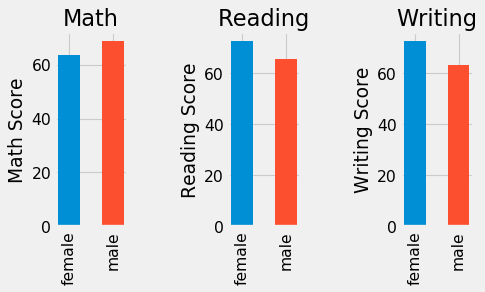

In [70]:
fem_condition = data['gender'] == 'female'
mal_condition = data['gender'] == 'male'

plt.style.use('fivethirtyeight')
plt.figure(figsize=(6,3), dpi=80, edgecolor='k')

plt.subplot(1,5,1)

plt.bar(data['gender'][fem_condition], data['math score'][fem_condition].mean(), width = 0.5, label='female') 
plt.bar(data['gender'][mal_condition], data['math score'][mal_condition].mean(), width = 0.5, label='male')

plt.xticks(rotation='vertical')
plt.title('Math')
plt.ylabel('Math Score')


plt.subplot(1,5,3)
plt.bar(data['gender'][fem_condition], data['reading score'][fem_condition].mean(), width = 0.5, label='female') 
plt.bar(data['gender'][mal_condition], data['reading score'][mal_condition].mean(), width = 0.5, label='male')

plt.title('Reading')
plt.ylabel('Reading Score')
plt.xticks(rotation='vertical')


plt.subplot(1,5,5) 
plt.bar(data['gender'][fem_condition], data['writing score'][fem_condition].mean(), width = 0.5, label='female') 
plt.bar(data['gender'][mal_condition], data['writing score'][mal_condition].mean(), width = 0.5, label='male')

plt.title('Writing')
plt.ylabel('Writing Score')
plt.xticks(rotation='vertical')

plt.show()

In [7]:
print('Mean Scores: \n') 
print(data.groupby('gender').mean())

Mean Scores: 

        math score  reading score  writing score
gender                                          
female   63.633205      72.608108      72.467181
male     68.728216      65.473029      63.311203


### <u>Conclusion 1</u>

From the above graphs and statistical analysis, we can conclude that on average, <b> Male students tend to be better at math than female students whereas female students are better at both reading and writing </b> 

## Percentage Composition

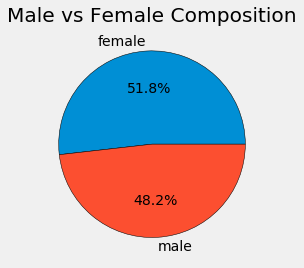

In [8]:
from collections import Counter

gender_counter = Counter() 
gender_counter.update(data['gender'])
gender_counts = [gender_counter['female'], gender_counter['male']] 

# print(f'Female Composition: {gender_counts[0]*100/sum(gender_counts)}%')
# print(f'Male Composition: {gender_counts[1]*100/sum(gender_counts)}%')

plt.pie(gender_counts, labels=['female','male'], wedgeprops={'edgecolor':'black'}, autopct='%1.1f%%')
plt.title('Male vs Female Composition')
plt.show()

### <u>Conclusion 2</u>

From the above Pie Chart, we can see that <b> More female students enrolled in the SAT test compared to male students </b>

## Lunch Program and Test Course Comparison

gender  lunch   
female  standard    329
male    standard    316
Name: lunch, dtype: int64


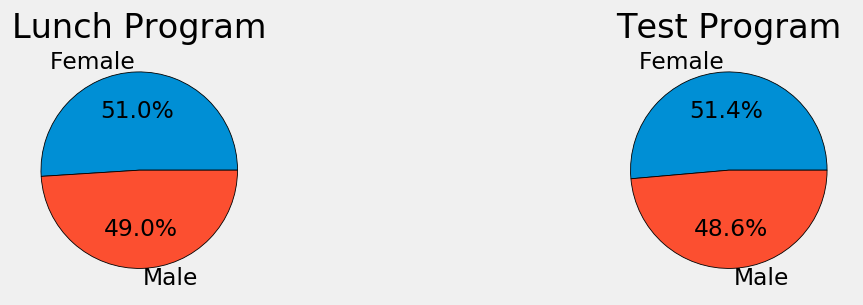

In [22]:
plt.figure(figsize=(8,4), dpi = 120, edgecolor='k')  

# Lunch Program 

plt.subplot(1,3,1)

gender_lunch_standard = data[data['lunch']=='standard'].groupby('gender')['lunch'].value_counts()
print(gender_lunch_standard)

plt.title('Lunch Program') 
plt.pie(gender_lunch_standard, labels=['Female','Male'], wedgeprops={'edgecolor':'k'}, autopct='%.1f%%')

# Test Course Prep

plt.subplot(1,3,3)

gender_test_true = data[data['test preparation course']=='completed'].groupby('gender')['test preparation course'].value_counts()
plt.title('Test Program') 
plt.pie(gender_test_true, labels=['Female','Male'], wedgeprops={'edgecolor':'k'}, autopct='%.1f%%')

plt.show()

In [34]:
total_females = data[data['gender'] == 'female'].shape[0]
total_males = data[data['gender'] == 'male'].shape[0]

print(f'Percentage of Female Population that took lunch program: {gender_lunch_standard[0]*100/total_females}%') 
print(f'Percentage of Male Population that took lunch program: {gender_lunch_standard[1]*100/total_males}%') 
print('\n')
print(f'Percentage of Female Population that took test program: {gender_test_true[0]*100/total_females}%') 
print(f'Percentage of Male Population that took test program: {gender_test_true[1]*100/total_males}%') 

Percentage of Female Population that took lunch program: 63.513513513513516%
Percentage of Male Population that took lunch program: 65.56016597510373%


Percentage of Female Population that took test program: 35.52123552123552%
Percentage of Male Population that took test program: 36.09958506224066%


### <u>Conclusion 3</u>

We can conclude that: 

<li> Roughly the same proportion of male and female students took the standard lunch program and the test preparation course.
    
<li> 63.5% of female population and 65.5% of male population took the lunch program 
<li> 35.5% of females and 36% of males took the test prep course

# Score Frequency Graphs 

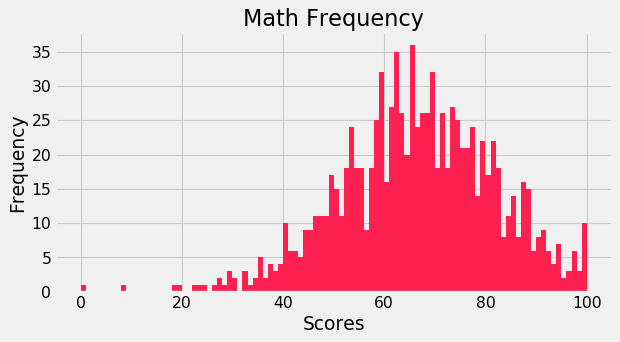

In [9]:
plt.figure(figsize=(8,4), dpi=80, edgecolor='k')

# Math Score 
plt.title('Math Frequency')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.hist(data['math score'], bins=np.arange(data['math score'].min(), data['math score'].max()+1), color='#ff2052') 
plt.show()


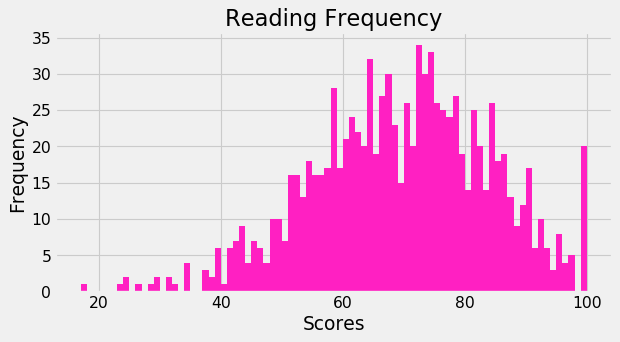

In [10]:
#Reading Score

plt.figure(figsize=(8,4), dpi=80, edgecolor='k')
plt.title('Reading Frequency')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.hist(data['reading score'], bins=np.arange(data['reading score'].min(), data['reading score'].max()+1), color='#ff20c2') 
plt.show()

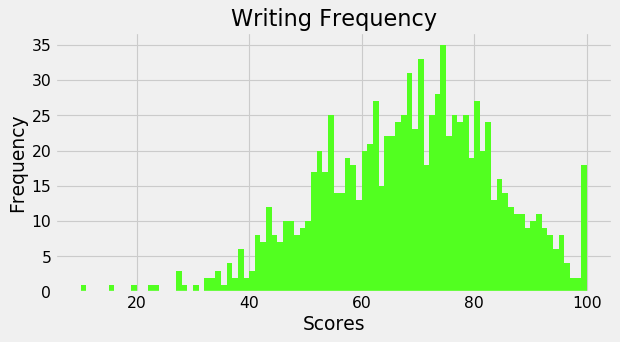

In [11]:
#Reading Score
plt.figure(figsize=(8,4), dpi=80, edgecolor='k')
plt.title('Writing Frequency')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.hist(data['writing score'], bins=np.arange(data['writing score'].min(), data['writing score'].max()+1), color='#52ff20') 
plt.show()

### <u> Conclusion </u> 

We can conclude here that <b> Most of the scores across Maths, Reading and Writing occur between the range of 60 and 80.</b>

<b> A Weird Observation: </b> In both Reading and Writing, the trend tends to be following a natural expectation that as we approach 100 marks, the frequency is reducing. However, at the exact score of 100, the trend changes and there's a drastic increase in frequency!

# Race/Ethnicity Analysis

## Score Comparison

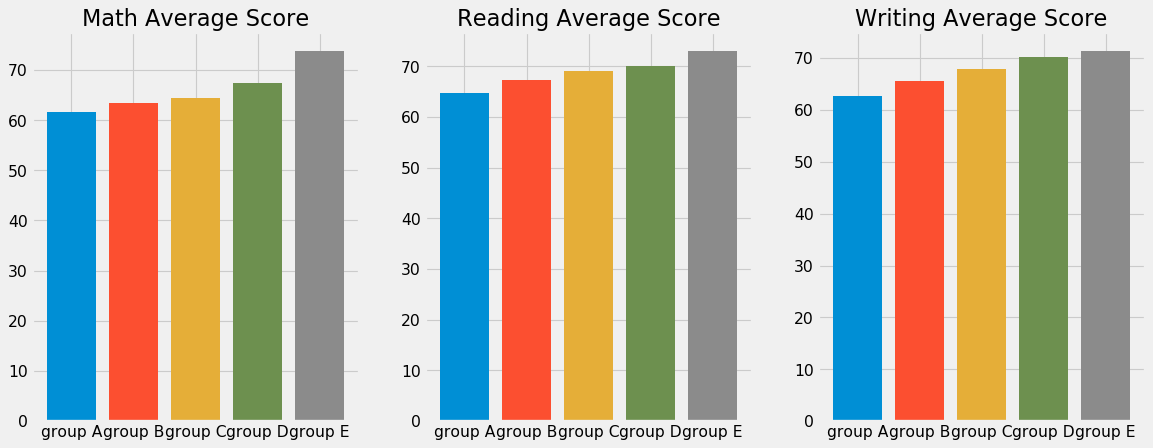

In [12]:
plt.figure(figsize=(16,6), dpi=80, edgecolor='k') 

plt.subplot(1,3,1)
plt.title('Math Average Score') 

group_a = data[data['race/ethnicity']=='group A']
group_b = data[data['race/ethnicity']=='group B']
group_c = data[data['race/ethnicity']=='group C']
group_d = data[data['race/ethnicity']=='group D']
group_e = data[data['race/ethnicity']=='group E']

plt.bar(group_a['race/ethnicity'], group_a['math score'].mean())
plt.bar(group_b['race/ethnicity'], group_b['math score'].mean())
plt.bar(group_c['race/ethnicity'], group_c['math score'].mean())
plt.bar(group_d['race/ethnicity'], group_d['math score'].mean())
plt.bar(group_e['race/ethnicity'], group_e['math score'].mean())

plt.subplot(1,3,2)
plt.title('Reading Average Score') 

plt.bar(group_a['race/ethnicity'], group_a['reading score'].mean())
plt.bar(group_b['race/ethnicity'], group_b['reading score'].mean())
plt.bar(group_c['race/ethnicity'], group_c['reading score'].mean())
plt.bar(group_d['race/ethnicity'], group_d['reading score'].mean())
plt.bar(group_e['race/ethnicity'], group_e['reading score'].mean())

plt.subplot(1,3,3)
plt.title('Writing Average Score') 

plt.bar(group_a['race/ethnicity'], group_a['writing score'].mean())
plt.bar(group_b['race/ethnicity'], group_b['writing score'].mean())
plt.bar(group_c['race/ethnicity'], group_c['writing score'].mean())
plt.bar(group_d['race/ethnicity'], group_d['writing score'].mean())
plt.bar(group_e['race/ethnicity'], group_e['writing score'].mean())

plt.show()

### <u> Conclusion 1 </u>

From the 3 graphs above, we can conclude that <b> on average, E>D>C>B>A across all 3 subjects! </b>

## Population Composition

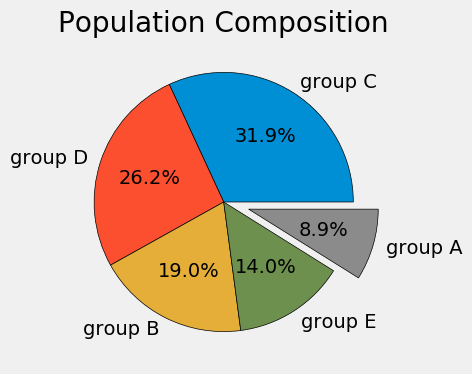

In [13]:
race_counter = Counter(data['race/ethnicity'])   # Counts Each Group 

counts = []
races = []
for item in race_counter.most_common(None):
    races.append(item[0])
    counts.append(item[1]) 

explode = [0,0,0,0,0.2]     # Emphasizing the least popular group 
    
plt.style.use('fivethirtyeight')
plt.figure(figsize=(6,4), dpi=100, edgecolor='k') 
plt.title('Population Composition')
plt.pie(counts, labels=races, wedgeprops={'edgecolor':'black'}, autopct='%.1f%%', explode = explode) 
plt.show()

### <u> Conclusion 2 </u> 

From the pie chart above, we can conclude that <b> max students belonged to Group C while least belonged to group A</b>.


## Financial Indication of Races

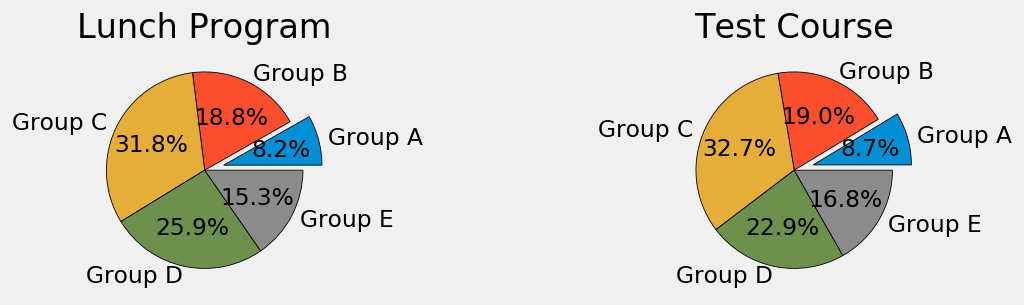

In [14]:
plt.figure(figsize=(8,4), dpi = 120, edgecolor='k') 

#Lunch Program

group_lunch_standard = data[data['lunch']=='standard'].groupby('race/ethnicity')['lunch'].value_counts()
races = ['Group A', 'Group B', 'Group C', 'Group D', 'Group E']
explode = [0.2,0,0,0,0]  # To emphasize that Group A is financially less stable
standard_count = []
for item in group_lunch_standard:
    standard_count.append(item)

plt.subplot(1,3,1) 
plt.title('Lunch Program')
plt.pie(standard_count,labels=races, wedgeprops={'edgecolor':'k'}, autopct='%.1f%%', explode = explode) 

# Test Preparation Course

test_prep_true = data[data['test preparation course']=='completed'].groupby('race/ethnicity')['test preparation course'].value_counts()
test_prep_count = [] 
for item in test_prep_true: 
    test_prep_count.append(item) 

plt.subplot(1,3,3)
plt.title('Test Course')
plt.pie(test_prep_count, labels=races, wedgeprops={'edgecolor':'k'}, autopct='%.1f%%', explode = explode)
    
plt.show()
    

### <u> Conclusion 3</u>

<li>We can conclude from the above pie charts that, <b> most likely group C is the richest race whereas group A is the poorest. </b>
    
<li> We can also come to the conclusion that because of lack of resources for group A, they did poorly compared to the other groups and thus, <b> group A is underpriveleged </b>

In [16]:
# Check parental education of Group 3 to conclude middle class
data[data['race/ethnicity'] == 'group E']['parental level of education'].value_counts()

associate's degree    39
some college          35
high school           22
bachelor's degree     18
some high school      18
master's degree        8
Name: parental level of education, dtype: int64

# Impact of Parental Education

## Score Comparison

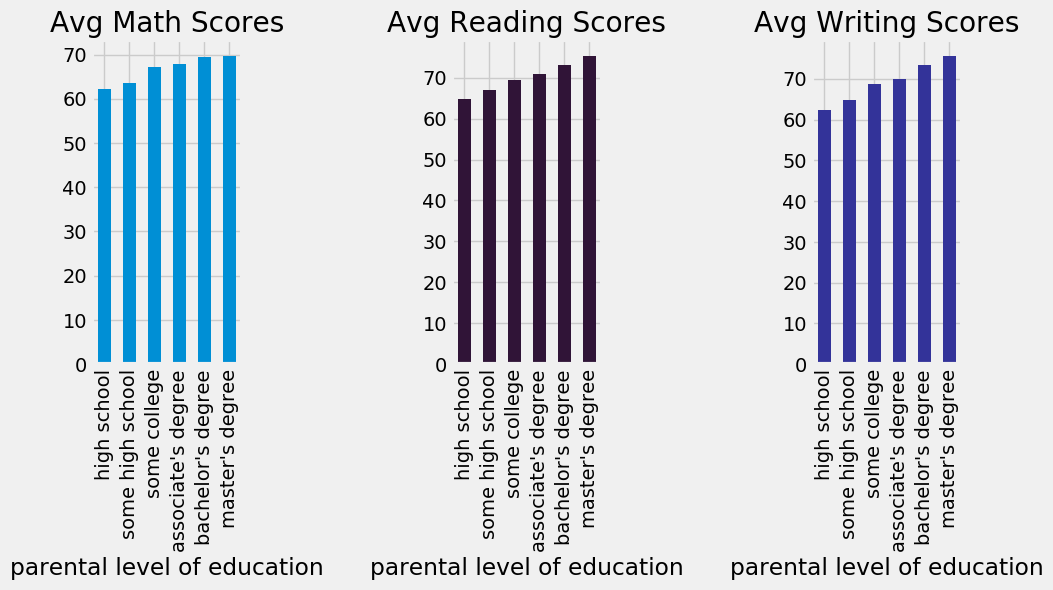

In [63]:
plt.figure(figsize=(10,4), dpi = 100, edgecolor='k') 

plt.subplot(1,5,1) # Math Scores
data.groupby('parental level of education')['math score'].mean().sort_values().plot(kind='bar', title='Avg Math Scores')

plt.subplot(1,5,3) # Reading Scores
data.groupby('parental level of education')['reading score'].mean().sort_values().plot(kind='bar', title='Avg Reading Scores', colormap='twilight_shifted')

plt.subplot(1,5,5) # Writing Scores
data.groupby('parental level of education')['writing score'].mean().sort_values().plot(kind='bar', title='Avg Writing Scores', colormap='terrain')

plt.show()

### <u> Conclusion 1</u> 

We can conclude from the above that the <b> higher the educational qualification of the parent, the better the scores are across the 3 subjects </b> 

## Population Composition

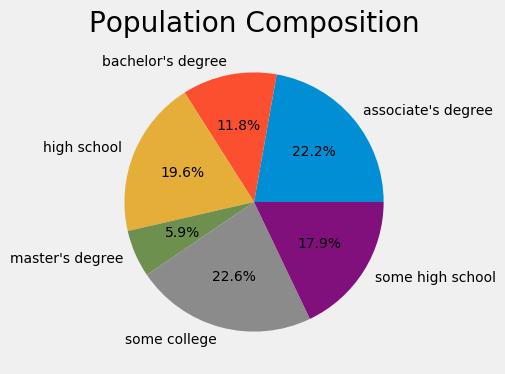

In [104]:
plt.figure(figsize=(6,4), dpi=100) 

chart = data.groupby('parental level of education')['gender'].count()
chart.name = ""  # Done to remove the name of the series disturbing the graph!

chart.plot(kind='pie', autopct='%.1f%%', title='Population Composition',fontsize=10)
plt.show()

### <u> Conclusion 2 </u> 

<b>Only 5.9% of students' parents have completed a master's degree whereas nearly 45% students' parents have either an associate's degree or attended some college. </b>

# Gender vs Parental Education

gender  parental level of education
female  some college                   118
        associate's degree             116
        high school                     94
        some high school                91
        bachelor's degree               63
        master's degree                 36
male    some college                   108
        associate's degree             106
        high school                    102
        some high school                88
        bachelor's degree               55
        master's degree                 23
Name: parental level of education, dtype: int64


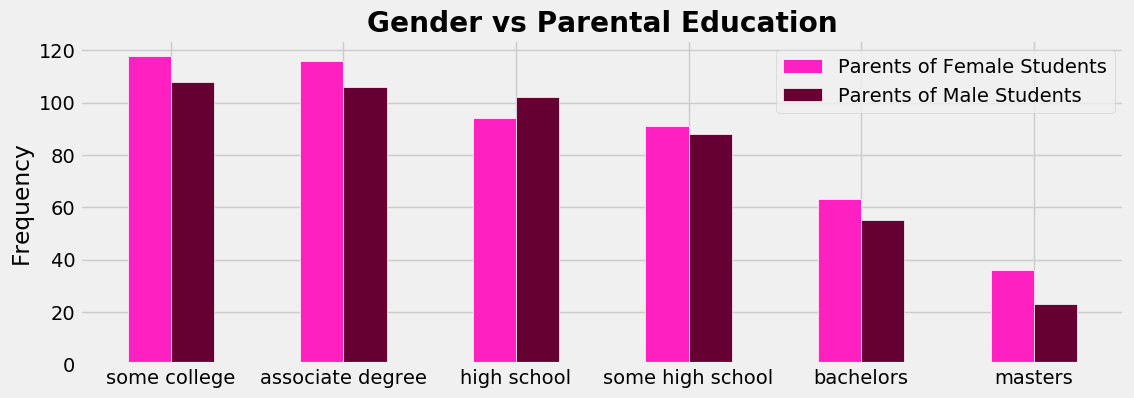

In [131]:
plt.figure(figsize=(12,4),dpi=100)

print(data.groupby('gender')['parental level of education'].value_counts())

# data.groupby('gender')['parental level of education'].value_counts().plot(kind='bar', color=['#cd20ff','#ff20c2','#ff2053','#20ff5d','#5d20ff', '#916484'])
# plt.legend(['some college','associate degree', 'high school','some high school','bachelors degree', 'masters degree'])

#Set Bar Width
bar_width = 0.25 

parent_list = ['some college','associate degree', 'high school','some high school','bachelors', 'masters']
female_parents = [] 
male_parents = [] 

for item in data.groupby('gender')['parental level of education'].value_counts()[0:6]:
    female_parents.append(item)

for item in data.groupby('gender')['parental level of education'].value_counts()[6:]:
    male_parents.append(item)

# Set position of bar on X axis
r1 = np.arange(len(male_parents))
r2 = [x + bar_width for x in r1]

# Make the plot
plt.bar(r1, female_parents, color='#ff20c2', width=bar_width, edgecolor='white', label='Parents of Female Students')
plt.bar(r2, male_parents, color='#660033', width=bar_width, edgecolor='white', label='Parents of Male Students')

#Labelling bars
plt.xticks([r + bar_width/2 for r in range(len(female_parents))], labels=parent_list)  # xticks is used to specify positions on the x axis where we want to start writing labels. The 2nd parameter here is the list of labels to be used
plt.title('Gender vs Parental Education', fontweight='bold')
plt.ylabel('Frequency')
plt.legend()

plt.show()

### <u> Conclusion </u> 

We can conclude from the graph above that in general the female students have more academically qualified parents, which is more evident when looking at college degrees instead of high school graduation. 



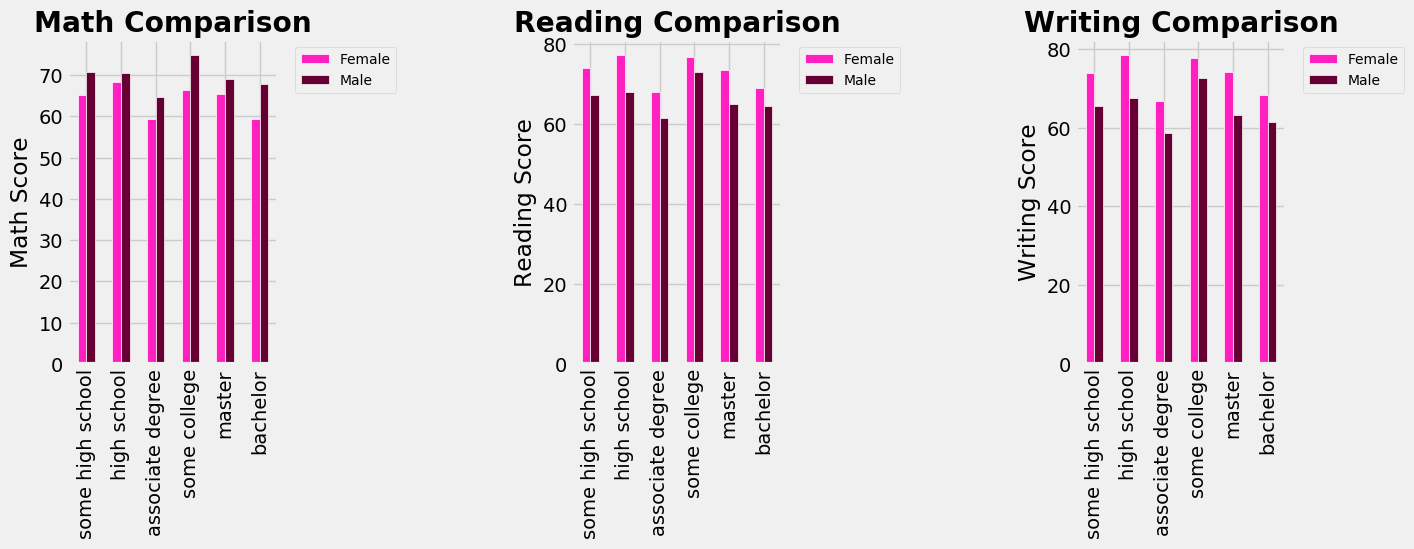

In [159]:
female_parents_math = [x for x in data[fem_condition].groupby('parental level of education')['math score'].mean()]
male_parents_math = [x for x in data[mal_condition].groupby('parental level of education')['math score'].mean()] 

female_parents_reading = [x for x in data[fem_condition].groupby('parental level of education')['reading score'].mean()]
male_parents_reading = [x for x in data[mal_condition].groupby('parental level of education')['reading score'].mean()] 

female_parents_writing = [x for x in data[fem_condition].groupby('parental level of education')['writing score'].mean()]
male_parents_writing = [x for x in data[mal_condition].groupby('parental level of education')['writing score'].mean()] 

parent_list = ['some high school','high school', 'associate degree','some college','master', 'bachelor']

plt.figure(figsize=(14,4),dpi=100)

plt.subplot(1,5,1)   # Math Plot

# Make the plot
plt.bar(r1, female_parents_math, color='#ff20c2', width=bar_width, edgecolor='white', label='Female')
plt.bar(r2, male_parents_math, color='#660033', width=bar_width, edgecolor='white', label='Male')

#Labelling bars
plt.xticks([r + bar_width/2 for r in range(len(female_parents))], labels=parent_list, rotation='vertical')  # xticks is used to specify positions on the x axis where we want to start writing labels. The 2nd parameter here is the list of labels to be used
plt.title('Math Comparison', fontweight='bold')
plt.ylabel('Math Score')
plt.legend(bbox_to_anchor=(1.05, 1), fontsize = 10)

# ------------------------------------------# 

plt.subplot(1,5,3)   # Reading Plot

# Make the plot
plt.bar(r1, female_parents_reading, color='#ff20c2', width=bar_width, edgecolor='white', label='Female')
plt.bar(r2, male_parents_reading, color='#660033', width=bar_width, edgecolor='white', label='Male')

#Labelling bars
plt.xticks([r + bar_width/2 for r in range(len(female_parents))], labels=parent_list, rotation='vertical')  # xticks is used to specify positions on the x axis where we want to start writing labels. The 2nd parameter here is the list of labels to be used
plt.title('Reading Comparison', fontweight='bold')
plt.ylabel('Reading Score')
plt.legend(bbox_to_anchor=(1.05, 1), fontsize = 10)

# ----------------------------------------- #

plt.subplot(1,5,5)   # Writing Plot

# Make the plot
plt.bar(r1, female_parents_writing, color='#ff20c2', width=bar_width, edgecolor='white', label='Female')
plt.bar(r2, male_parents_writing, color='#660033', width=bar_width, edgecolor='white', label='Male')

#Labelling bars
plt.xticks([r + bar_width/2 for r in range(len(female_parents))], labels=parent_list, rotation='vertical')  # xticks is used to specify positions on the x axis where we want to start writing labels. The 2nd parameter here is the list of labels to be used
plt.title('Writing Comparison', fontweight='bold')
plt.ylabel('Writing Score')
plt.legend(bbox_to_anchor=(1.05, 1), fontsize = 10)


plt.show()



# Gender vs Ethnicity